<h2 style="text-align:center;padding:10px;background-color:#205781;color:#ffe;border-radius:5px;font:bold;font-size:2.25em">
Taxi Trip Duration Data EDA
</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.dpi"] = 150 # dots per inch , controls the figures quality

Load The Data

In [2]:
df = pd.read_parquet("data/nyc_taxi_trip_duration/train.parquet")

> #### Start with some basic exploration.

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
1388299,id3172952,1,2016-01-27 21:11:47,2016-01-27 21:30:07,2,-73.986176,40.726463,-73.990959,40.756088,N,1100,47,34,40.5,T,0.0,9
1297060,id2377120,1,2016-05-03 23:32:45,2016-05-03 23:37:46,1,-73.916367,40.762310,-73.932518,40.757336,N,301,56,51,53.5,0.61,0.0,0
1123601,id3930104,2,2016-05-08 06:29:04,2016-05-08 06:48:53,1,-73.987793,40.747261,-74.014572,40.682049,N,1189,66,49,57.5,0.16,0.0,0
92835,id2127080,1,2016-02-12 22:19:19,2016-02-12 22:51:06,1,-73.987381,40.729084,-73.796173,40.707802,N,1907,27,15,21.0,0.00,0.0,0
359236,id3120815,1,2016-04-10 16:46:37,2016-04-10 17:15:23,1,-73.953926,40.785439,-73.984207,40.770081,N,1726,50,31,40.5,0.00,0.0,0


In [4]:
df.isna().sum()

id                     0
vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
store_and_fwd_flag     0
trip_duration          0
maximum temperature    0
minimum temperature    0
average temperature    0
precipitation          0
snow fall              0
snow depth             0
dtype: int64

In [5]:
print(df.shape)
print(df.duplicated().sum())

(1312779, 17)
0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1312779 entries, 1388299 to 1303942
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   id                   1312779 non-null  object        
 1   vendor_id            1312779 non-null  int64         
 2   pickup_datetime      1312779 non-null  datetime64[ms]
 3   dropoff_datetime     1312779 non-null  datetime64[ms]
 4   passenger_count      1312779 non-null  int64         
 5   pickup_longitude     1312779 non-null  float64       
 6   pickup_latitude      1312779 non-null  float64       
 7   dropoff_longitude    1312779 non-null  float64       
 8   dropoff_latitude     1312779 non-null  float64       
 9   store_and_fwd_flag   1312779 non-null  object        
 10  trip_duration        1312779 non-null  int64         
 11  maximum temperature  1312779 non-null  int64         
 12  minimum temperature  1312779 non-null  int64         
 

In [7]:
df['snow depth'].unique()

array(['9', '0', '2', '6', 'T', '4', '19', '22', '17', '1'], dtype=object)

In [8]:
df['snow fall'].unique()

array(['0.0', '0.2', 'T', '0.4', '27.3', '0.1', '0.5', '2.5', '1.4'],
      dtype=object)

In [9]:
df['precipitation'].unique()

array(['T', '0.61', '0.16', '0.00', '0.01', '0.45', '0.54', '0.12',
       '0.11', '0.05', '0.18', '0.04', '0.24', '1.80', '0.14', '2.31',
       '0.22', '0.02', '0.06', '0.40', '0.20', '0.91', '0.29', '0.09',
       '0.07', '0.30', '0.25', '0.38', '0.47', '0.53', '0.44', '0.73',
       '1.65', '0.03', '1.01', '1.22'], dtype=object)

#### Some data types aren't proper.
* 'vendor_id' and 'passenger_count' are better to be converted to categorical.
* 'pickup_datetime' and 'dropoff_datetime' should be datetime.
* I think 'snow depth' can be integer(after replacing 'T' records) while 'snow fall' and 'precipitation' should be float.
#### these are the clear wrong(or not proper) data types for now.


> #### I prefer to convert them before moving forward.

>#### due to owner of the weather data on kaggle, in precipitation column, 'T' is short for Trace. which indicates very small quantity.
>#### So, i decided to replace it with the least amount recorded in the column. although it indicates very small quantity, I think this may affect the choice of taking the car or taking a taxi

In [10]:
# first. replace the 'T' with some arbitrary value
cols = ['snow depth', 'snow fall', 'precipitation']
for col in cols :
    df[col] = df[col].replace('T', 100)

In [11]:
# then, convert data types
df[['vendor_id' , 'passenger_count']] = df[['vendor_id' , 'passenger_count']].astype('category')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['snow depth'] = df['snow depth'].astype('int') 
df[['snow fall' , 'precipitation']] = df[['snow fall', 'precipitation']].astype('float')

In [12]:
# replace back the arbitrary value to the smallest value at each feature (index [1] to avoid the smallest value 0)
cols = ['snow depth', 'snow fall', 'precipitation']
for col in cols :
    val = sorted(df[col].unique())[1]
    df[col] = df[col].replace(100, val)

In [13]:
df.dtypes

id                             object
vendor_id                    category
pickup_datetime        datetime64[ms]
dropoff_datetime       datetime64[ms]
passenger_count              category
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag             object
trip_duration                   int64
maximum temperature             int64
minimum temperature             int64
average temperature           float64
precipitation                 float64
snow fall                     float64
snow depth                      int64
dtype: object

>#### let's get some fast statistics and inferences about the data.

In [14]:
df.describe()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
count,1312779,1312779,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06
mean,2016-04-01 10:07:22.105000,2016-04-01 10:23:22.231000,-7.397350e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.601259e+02,5.939869e+01,4.361274e+01,5.150571e+01,8.665667e-02,6.765983e-02,4.459974e-01
min,2016-01-01 00:00:53,2016-01-01 00:03:31,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,1.500000e+01,-1.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2016-02-17 17:01:22,2016-02-17 17:18:00.500000,-7.399187e+01,4.073735e+01,-7.399132e+01,4.073587e+01,3.970000e+02,4.600000e+01,3.200000e+01,3.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2016-04-01 17:17:47,2016-04-01 17:33:50,-7.398175e+01,4.075408e+01,-7.397975e+01,4.075452e+01,6.620000e+02,5.900000e+01,4.400000e+01,5.150000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,2016-05-15 03:36:51.500000,2016-05-15 03:50:15,-7.396735e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,7.300000e+01,5.400000e+01,6.300000e+01,4.000000e-02,0.000000e+00,0.000000e+00
max,2016-06-30 23:59:37,2016-07-01 23:02:03,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,9.200000e+01,7.300000e+01,8.150000e+01,2.310000e+00,2.730000e+01,2.200000e+01
std,NaN,NaN,7.305100e-02,3.290834e-02,7.275569e-02,3.617643e-02,5.416685e+03,1.695535e+01,1.484060e+01,1.568264e+01,2.492834e-01,9.417497e-01,2.250180e+00



* The 'tirp_duration' feature has very small values as well as enormous values.
  It seems to be skewed to the right as the mean is far from the median. and we can see that the standard deviation is even much greater than the range of the first half of the data itself. which indicates the existence of very big outliers.
* The latitude and longitude coordinates show clear inconsistencies. NewYork city lies at these coordinates boundaries :
 Latitude: 40.4774° N to 40.9176° N , Longitude: -74.2591° W to -73.7004° W. and we can see the min and max coordinates are way far from these coordinates
* Most of the days has neither snow nor rain.


>#### I will start by checking the 'trip_duration' column.

>#### when I first plotted the boxplot, i found 4 outliers above 1 million. so, i removed them first and also plotted the histogram in log scale to better see the ditribution.

In [15]:
outs = (df[df['trip_duration'] > 1e6]).index
df.drop(outs, inplace=True)

Text(0.5, 0, 'Trip Duration')

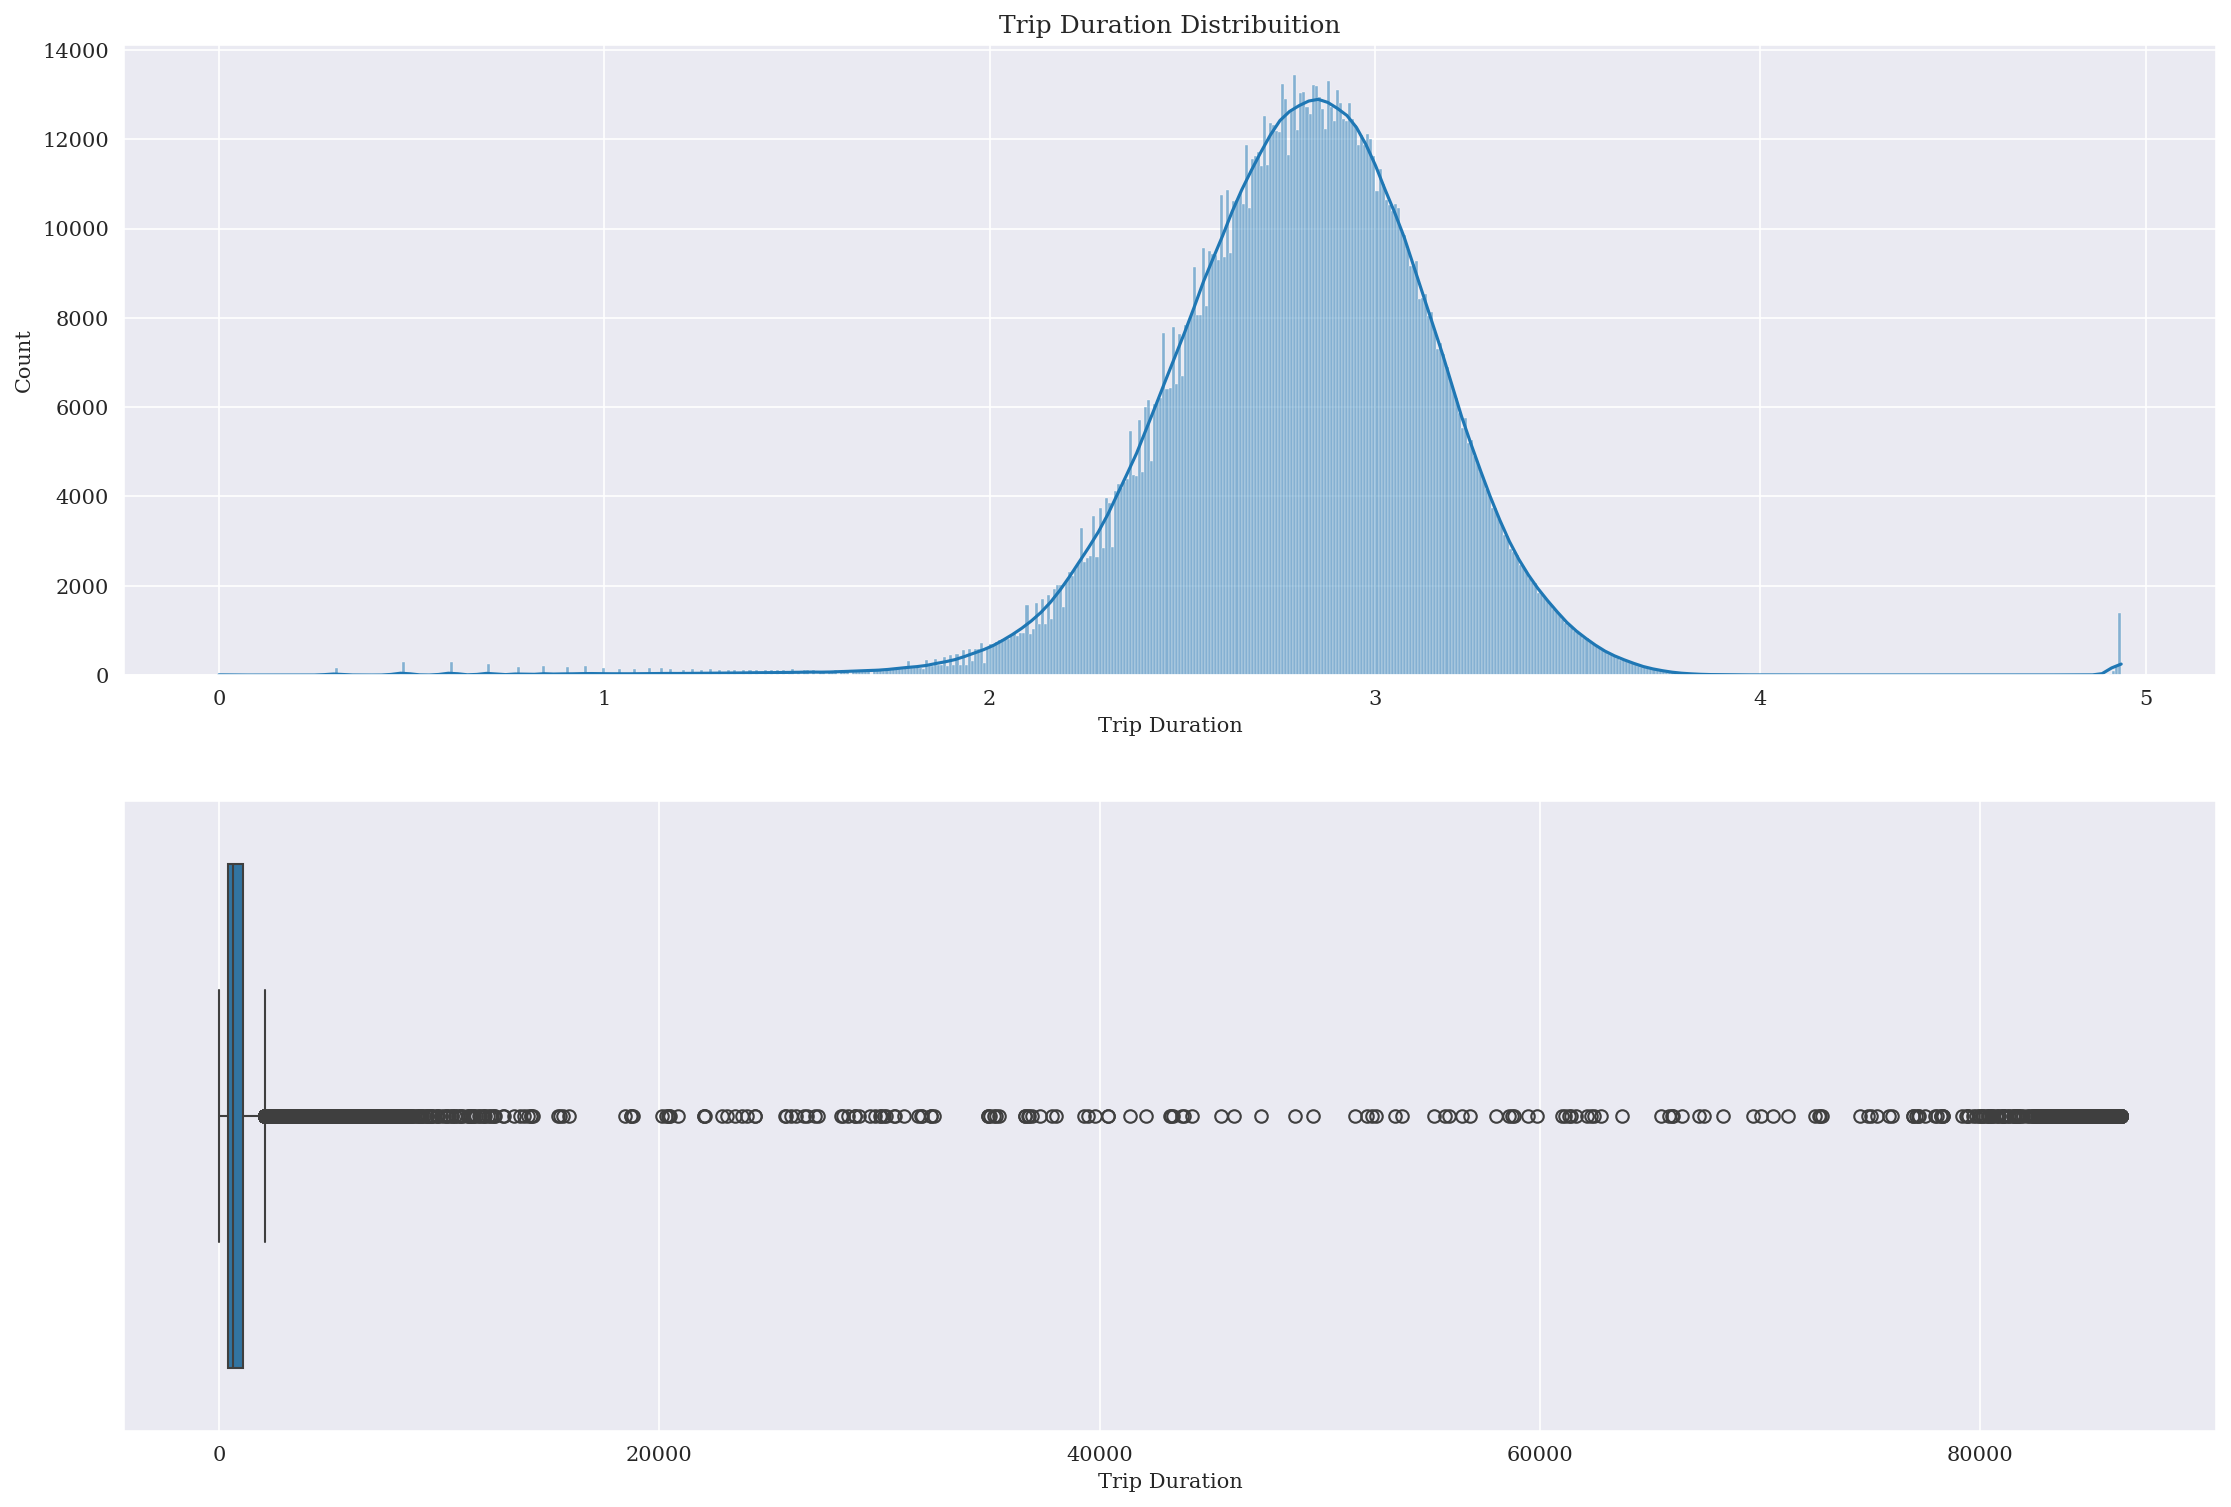

In [16]:
plt.figure(figsize=(18,12))

plt.subplot(2,1,1)
sns.histplot(x=np.log10(df['trip_duration']), kde=True)
plt.title('Trip Duration Distribuition')
plt.xlabel('Trip Duration')

plt.subplot(2,1,2)
sns.boxplot(data= df, x='trip_duration')
plt.xlabel('Trip Duration')

>#### so, now we can see the the huge amount of outliers that exisit in the durations values.
> #### the majority of the durations are between about 150 to 3000 seconds.

>#### Before deciding a threshold to remove these big strange durations, let us invetigate them a little.

>#### First I will check the 'store_and_fwd_flag' column. it ndicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server.
>#### I assume that the trips that had to store record rather than sending it directly represent a big percentage of the outliers points (maybe the driver forgot to end the time recorder or something like that)

In [17]:
big_durations = df.loc[df['trip_duration'] > 3600, ['trip_duration', 'store_and_fwd_flag']]

In [18]:
print(f"percentage of 'store_and_fwd_flag' = Y in the whole data= {len(df[df['store_and_fwd_flag'] == 'Y']) / df.shape[0]}")
print(f"percentage of 'store_and_fwd_flag' = Y in big_durations= {len(big_durations[big_durations['store_and_fwd_flag'] == 'Y']) / big_durations.shape[0]}")

percentage of 'store_and_fwd_flag' = Y in the whole data= 0.005491420845156253
percentage of 'store_and_fwd_flag' = Y in big_durations= 0.01599060439064053


>#### based on the above percentages, I think I can say that my assumption is true to big extent. the percentage of 'Y' in the big_duration data(trips with durations above 1 hour) is much greater than the corresponding percentage in the whole data.
>#### anyway, let's continue :)

Text(0.5, 0, 'Durations')

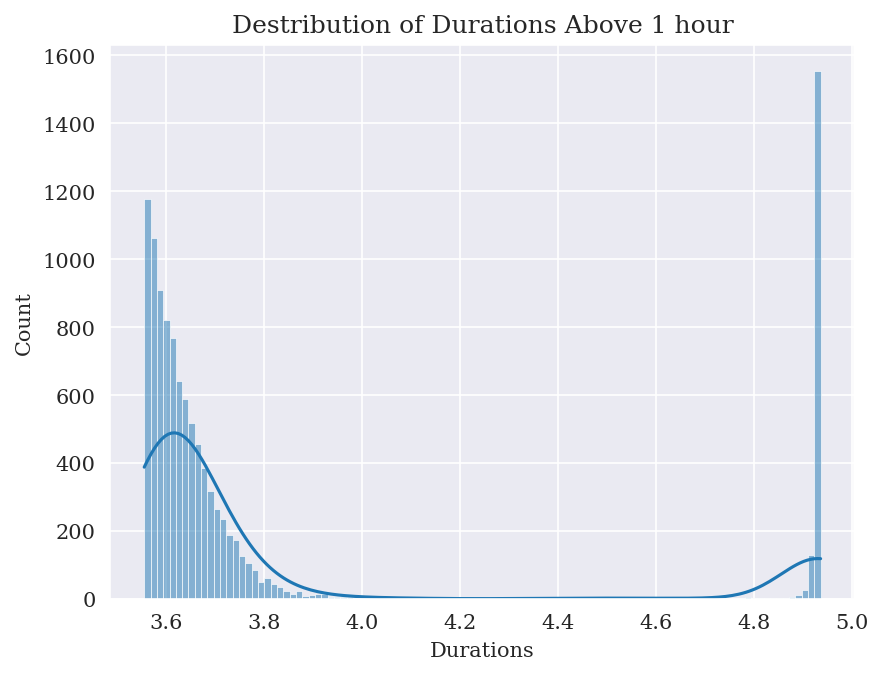

In [19]:
big_durations = df.loc[df['trip_duration'] > 3600, 'trip_duration']
sns.histplot(x=np.log10(big_durations), kde=True)

plt.title('Destribution of Durations Above 1 hour')
plt.xlabel('Durations')

In [20]:
# number of trips from the begining of the histogram(above 1 hour) and up to the point 4 on the x-axis(2h 46m)
df[(df['trip_duration'] > 3600) & (df['trip_duration'] < (10 ** 4))].count().iloc[0]

np.int64(9171)

In [21]:
print(f'percentage of trips with durations above 1 hour = {df[df["trip_duration"] > 3600].count().iloc[0] / df.shape[0]:0.5f}')
print(f'percentage of trips with durations below 2 minutes = {df[df["trip_duration"] < 120].count().iloc[0] / df.shape[0]:0.5f}')

percentage of trips with durations above 1 hour = 0.00843
percentage of trips with durations below 2 minutes = 0.01904


* These durations spike at the end of the histogram are no doubt incorrect(about 22 hours).so, they will be removed.
* Up to the point 4.0 (1h to about 2h 46m) there are 9171 trips.it's not a small number in absolute but if compared to the total trips number it's too small.
* it's not reasonable to have such long taxi durations in NewYork in my opinion. but as I said, they are small number compared to tha total. so, they may be special cases like long distance trips while so heavy traffic...or mistakes in data.    
* I decided to set a threshold at the middle at point 0.4 (2h 46m). i also will remove trips with durations below 2 minutes
  and with these limits i think that i'm quite conservative :)

In [22]:
df = df[(df['trip_duration'] <= 10000) & (df['trip_duration'] > 120)]

Text(0.5, 1.0, 'Average Trip Duration per Vendor')

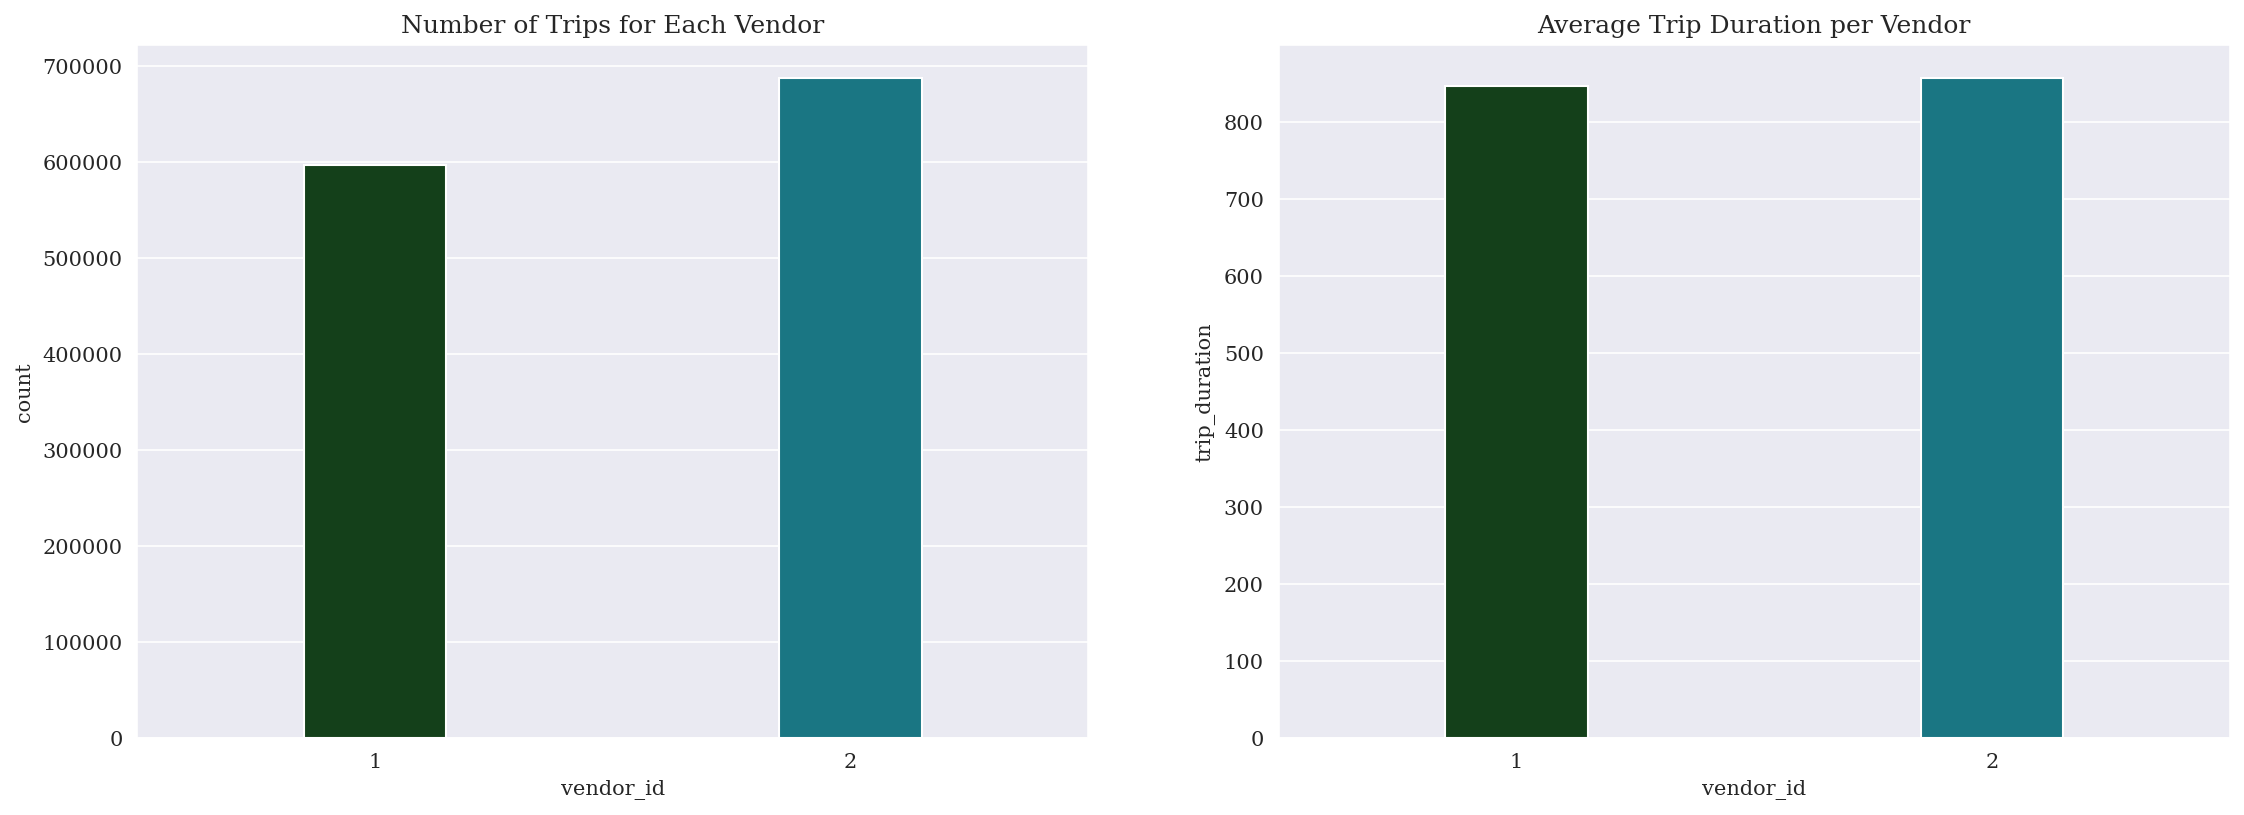

In [23]:
# break the trips durations by vendor 
plt.figure(figsize=(18,6))
palette = ['#0D4715', '#088395']

plt.subplot(1,2,1)
sns.countplot(data=df, x='vendor_id', width=.3, palette=palette)
plt.title('Number of Trips for Each Vendor')


group = df.groupby('vendor_id', as_index=False)['trip_duration'].mean()
plt.subplot(1,2,2)
sns.barplot(data=group, x='vendor_id', y='trip_duration', width=.3, palette=palette)
plt.title('Average Trip Duration per Vendor')

> #### Ok,vendor 2 has trips more than the first vendor. and thay both have almost the same average trip duration  

In [24]:
df['passenger_count'].unique()

[2, 1, 6, 4, 5, 3, 0, 9]
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [25]:
df.loc[df['passenger_count'].isin([0,7,8,9]), 'passenger_count'].value_counts().sort_values()

passenger_count
2     0
1     0
3     0
4     0
5     0
6     0
8     0
7     0
9     1
0    12
Name: count, dtype: int64

> #### There are 1 record with 9 passengers and 13 records with 0 passengers.
>#### No need to remove them.I will just replace them with the median passenger count   

In [26]:
df.loc[df['passenger_count'].isin([0,9]), 'passenger_count'] = df['passenger_count'].mode()

Text(0.5, 1.0, 'Average Trip Duration per Passenger Count')

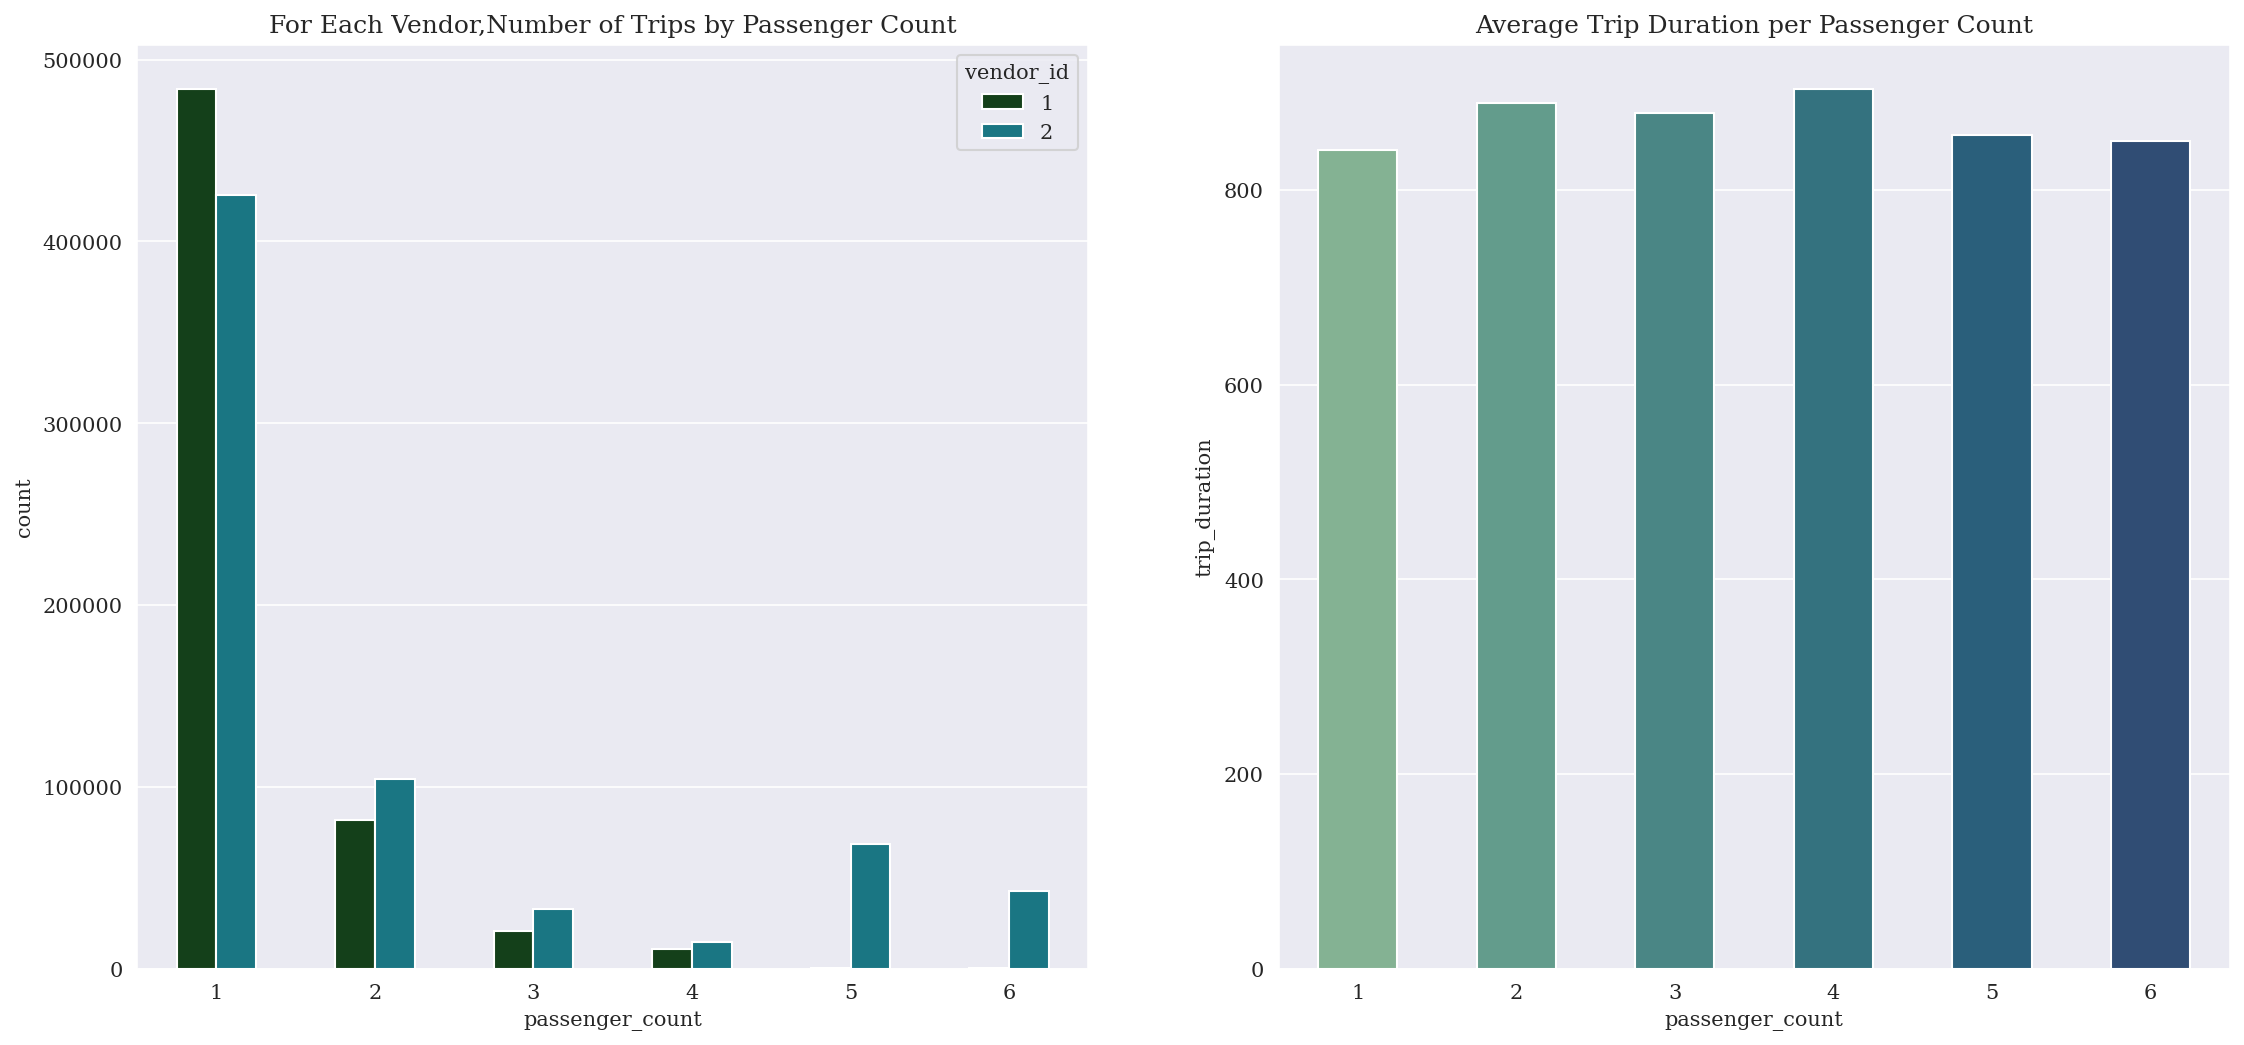

In [27]:
plt.figure(figsize=(18,8))
# palette = ['#0D4715', '#5CB338', '#7CF5FF', '#1B56FD','#088395', '#0118D8']
palette = ['#0D4715', '#088395']

plt.subplot(1,2,1)
order = np.arange(1,7)
sns.countplot(data=df, x='passenger_count', width=.5, hue='vendor_id', order=order ,palette=palette)
plt.title('For Each Vendor,Number of Trips by Passenger Count')

group = df.groupby('passenger_count', as_index=False)['trip_duration'].mean()
plt.subplot(1,2,2)
sns.barplot(data=group, x='passenger_count', y='trip_duration', width=.5, order=order, palette='crest')
plt.title('Average Trip Duration per Passenger Count')

In [28]:
print(f"number of trips for vendor 1 with 5 and 6 passengers = {df[(df['vendor_id'] == 1) & (df['passenger_count'].isin([5,6]))].count().iloc[0]}")
print(f"number of trips for vendor 2 with 5 and 6 passengers = {df[(df['vendor_id'] == 2) & (df['passenger_count'].isin([5,6]))].count().iloc[0]}")

number of trips for vendor 1 with 5 and 6 passengers = 445
number of trips for vendor 2 with 5 and 6 passengers = 111178


>#### Most of the trips with 5 and 6 passengers are with vendor 2. This suggests that the second vendor cars' are bigger in size.

Text(0, 0.5, 'Trips Number')

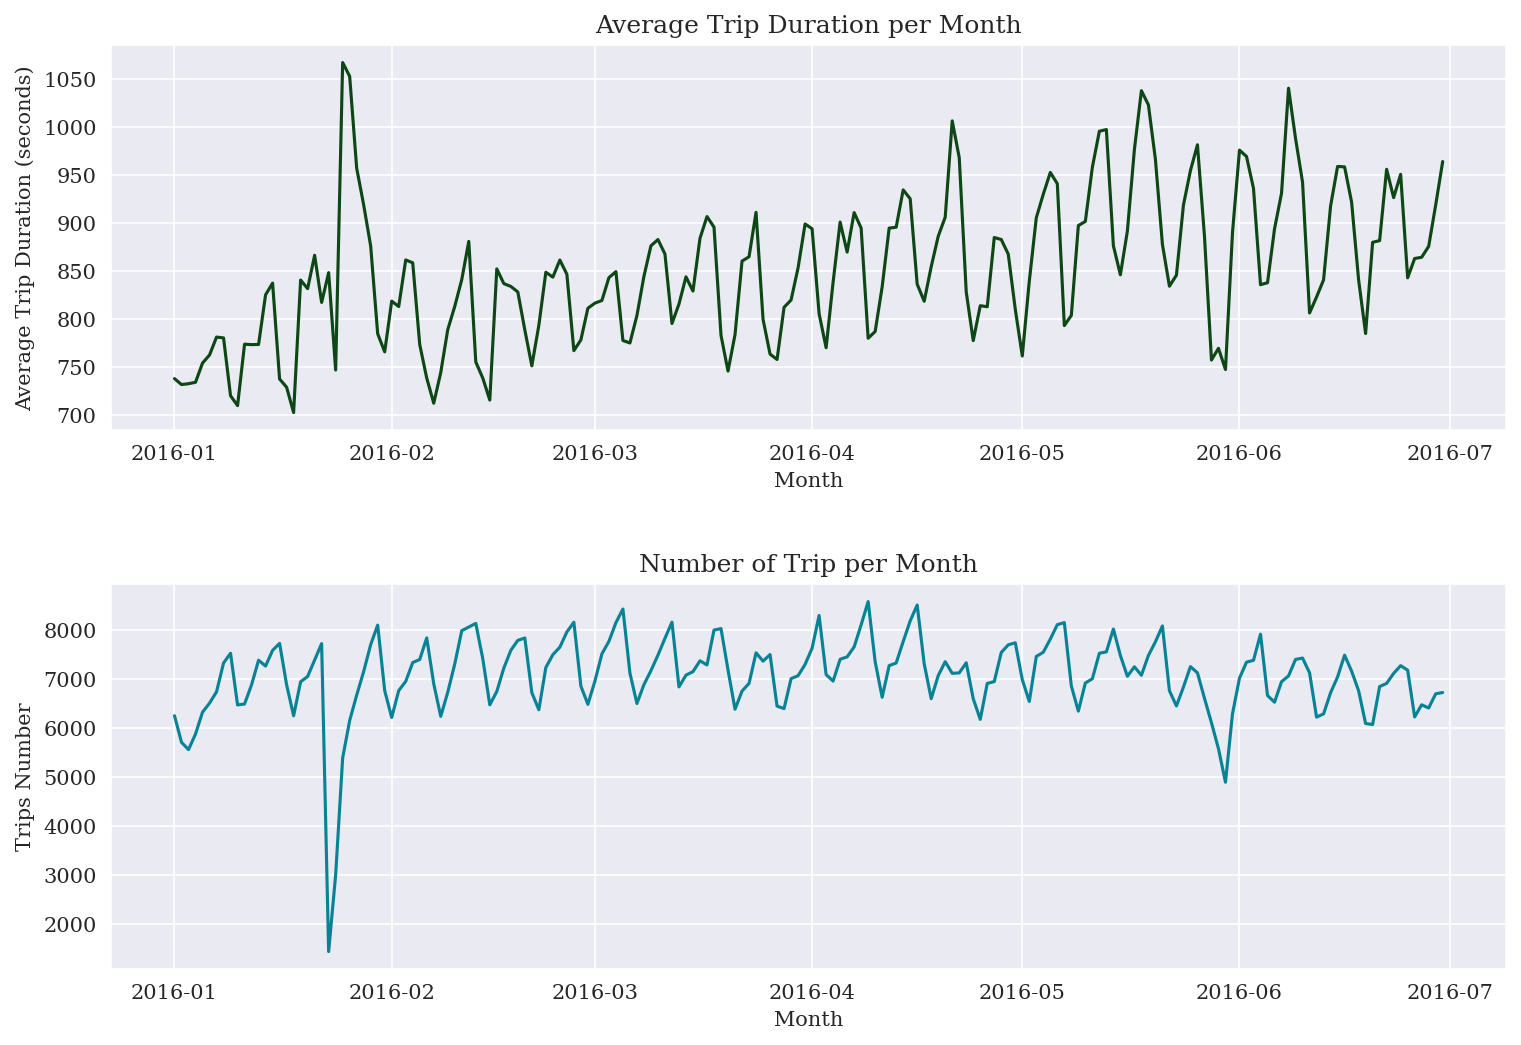

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(12,8), gridspec_kw={'hspace': 0.4})

# get the average trip duration per day
group = df.groupby(df['pickup_datetime'].dt.date)['trip_duration'].mean().reset_index()
group.columns = ['month', 'avg_duration']

sns.lineplot(data=group, x='month', y='avg_duration', ax=ax[0], color=palette[0])
ax[0].set_title('Average Trip Duration per Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Average Trip Duration (seconds)')

# get the trips number per day
group = df.groupby(df['pickup_datetime'].dt.date).size().reset_index()
group.columns = ['month', 'trips']

sns.lineplot(data=group, x='month', y='trips', ax=ax[1], color=palette[1])
ax[1].set_title('Number of Trip per Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Trips Number')

In [30]:
# investigate the weather conditions for the period of last days of january.
df[(df['pickup_datetime'] > '2016-01-20') & (df['pickup_datetime'] < '2016-01-30')][['average temperature',	'precipitation', 'snow fall' ,'snow depth']].mean()

average temperature    33.922015
precipitation           0.058746
snow fall               0.690736
snow depth              7.338872
dtype: float64

>#### We notice the existence of snow at these days (as indicated by snow depth value)

In [31]:
# number of snowy days at this period compared to the number of all the snowy days
len(df[(df['pickup_datetime'] > '2016-01-20') & (df['pickup_datetime'] < '2016-01-30') & (df['snow depth'] != 0)]) / len(df[df['snow depth'] != 0])

0.39002755543891876

>#### From the describe function result at the begining of the analysis, we found that most of the data has no snow (we can prove that by noticing the the 75% percentile value for 'snow fall' and also 'snow depth' is zero).
>#### and from the above cell, we see that the days that have snow in the period under investigation represent about more than half the number of days that has snow at the whole data.
>#### maybe this is the reason(or even one of them) why this sudden drop at trips number versus rise in the average durations appear at this period in the line plot.

>#### Now, check the target column with the weather features.

In [32]:
df['average temperature'].nunique()

95

Text(0.5, 1.0, 'Average Trip Duration per Average Temperature')

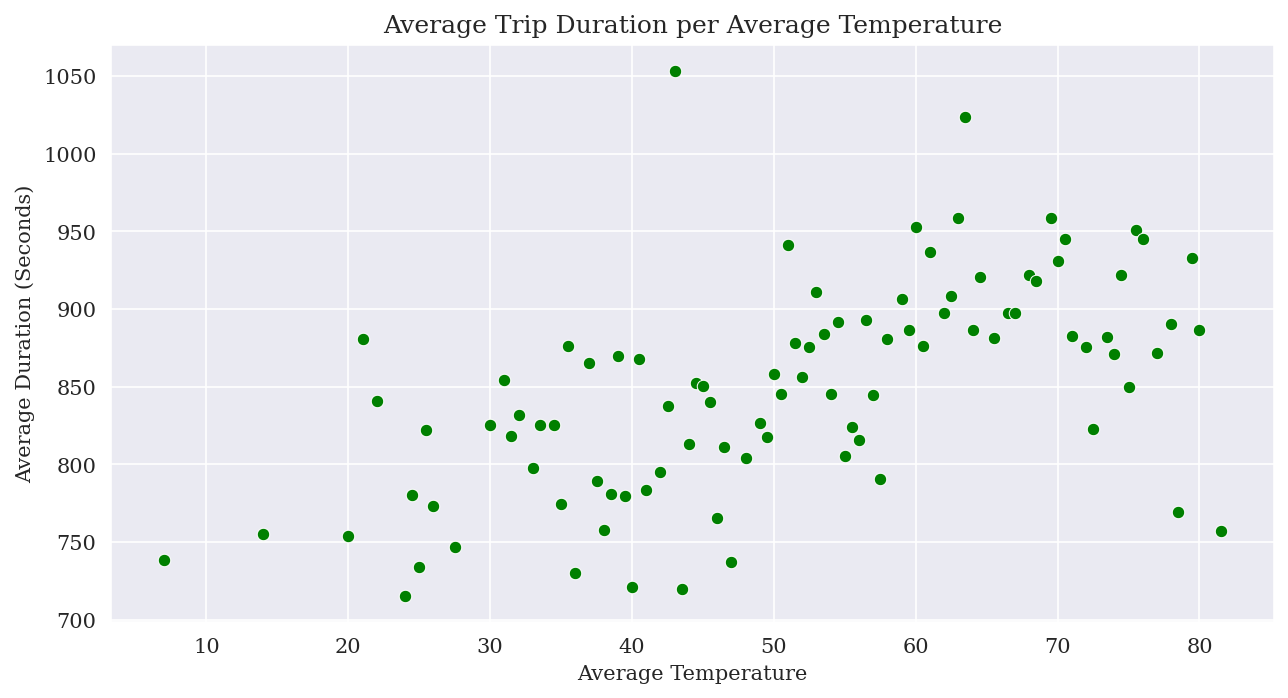

In [33]:
# show the trend of durations for increasing temperatures 
plt.figure(figsize=(10,5))
group = df.groupby('average temperature')['trip_duration'].mean().reset_index()

sns.scatterplot(data=group, x='average temperature', y='trip_duration', color='green')
plt.xlabel('Average Temperature')
plt.ylabel('Average Duration (Seconds)')
plt.title('Average Trip Duration per Average Temperature')

> #### It's not a strict increase. but, the overall trend shows that the average duration time increase with the temperature. may be beacause people tend to take taxi when it's hot rather than walking for example.

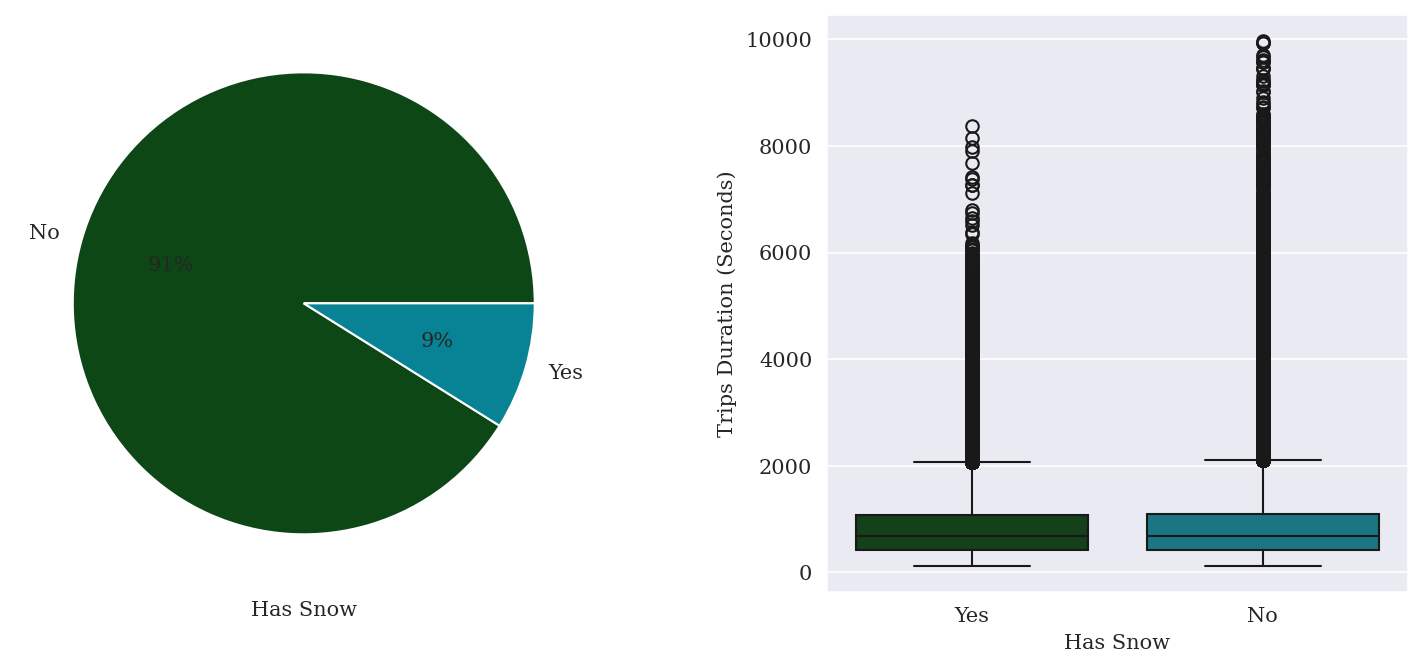

In [34]:
# check the effect of snow on traffic hence durations
plt.figure(figsize=(12,5))

snow = pd.concat([df['snow depth'].apply(lambda x: 'Yes' if x>0 else 'No') , df['trip_duration']] , axis=1)

plt.subplot(1,2,1)
percents = snow['snow depth'].value_counts().reset_index()
plt.pie(percents['count'], labels=percents['snow depth'] ,autopct='%.0f%%', colors=palette)
plt.xlabel('Has Snow')

plt.subplot(1,2,2)
sns.boxplot(data=snow, x='snow depth', y='trip_duration', palette= palette)
plt.xlabel('Has Snow')
plt.ylabel('Trips Duration (Seconds)')

plt.subplots_adjust(wspace=0.4)

>#### Ok,after all, my assumption wasn't that true 🙁. I found that both the snowy and non-snowy days have almost the same median trip duration.
>#### I assumed that snowy days would have a little higher average duration than this.Although it seems this is not the case,no doubt that snow affects the traffic. 

Text(0, 0.5, 'Latitude')

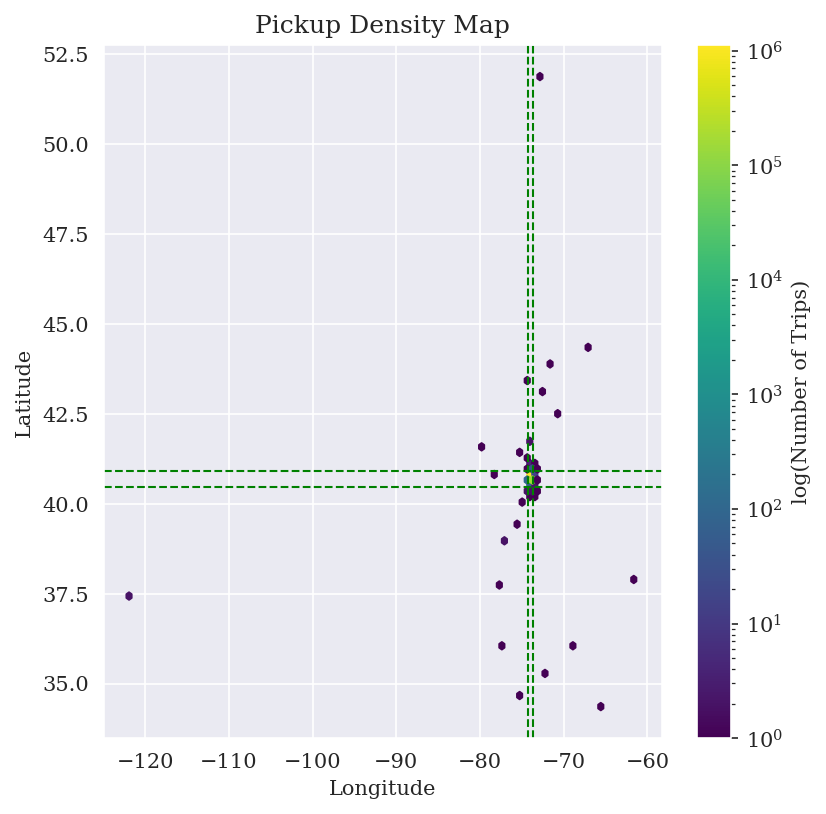

In [35]:
# just to see the concentration of pick up trips locations' 
plt.figure(figsize=(6, 6))

latitude = 40.4774, 40.9176
longitude = -74.2591, -73.7004

ax = plt.hexbin(df['pickup_longitude'], df['pickup_latitude'], gridsize=100, cmap='viridis', bins='log')

plt.axvline(x = longitude[0], color = "green", linestyle = "--", linewidth = 1)
plt.axvline(x = longitude[1], color = "green", linestyle = "--", linewidth = 1)

plt.axhline(y = latitude[0], color = "green", linestyle = "--", linewidth = 1)
plt.axhline(y = latitude[1], color = "green", linestyle = "--", linewidth = 1)

plt.colorbar(label='log(Number of Trips)')
plt.title('Pickup Density Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

>#### Most taxi pickups are concentrated in a small geographic region.
>#### the dashed lines are approximate limits for NewYork city.this shows there are number of trips outside these limits.which are often errors in specifying the location.

In [36]:
# removing trips that are outside New York limits 
df_filtered = df[
    (df['pickup_latitude'].between(latitude[0], latitude[1])) &
    (df['pickup_longitude'].between(longitude[0], longitude[1])) &
    (df['dropoff_latitude'].between(latitude[0], latitude[1])) &
    (df['dropoff_longitude'].between(longitude[0], longitude[1]))
]
print(f"Number of Trips with coordinates outside NewYork = {df.shape[0] - df_filtered.shape[0]}")
df = df_filtered

Number of Trips with coordinates outside NewYork = 1019


>#### Now, I will extract some features that hopefully be useful.

>#### First, drop columns that aren't useful.

In [37]:
df.drop(columns=['id', 'dropoff_datetime', 'store_and_fwd_flag', 'maximum temperature', 'minimum temperature', 'snow fall'], inplace=True)

 * The reasons why i dropped these columns :-
     * 'id' , 'store_and_fwd_flag' : will not be useful in predicting the trip duration
     *  'dropoff_datetime' : leake direct information about the target (pickup_datetime - dropoff_datetime = trip_duration)
     *  'maximum temperature', 'minimum temperature', 'snow fall' : redundunt features. 'average temperature' and 'snow depth' are enough.

>#### extract new useful date and time features 

In [38]:
df['day'] = df['pickup_datetime'].dt.day 
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['hour'] = df['pickup_datetime'].dt.hour 
df['month'] = df['pickup_datetime'].dt.month

# no need now for pickup_datetime column
df.drop('pickup_datetime', axis= 1, inplace= True)

>#### I will visualize these new features with trip_duration to see their effect on it.

Text(0.5, 1.0, 'Average Trip Duration Among Week Days')

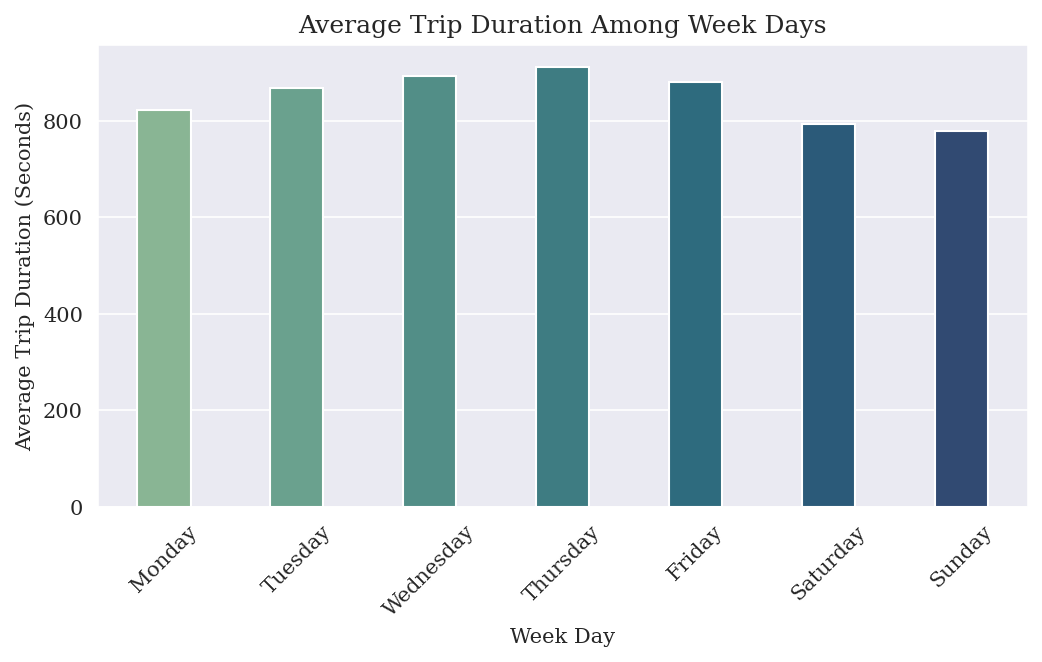

In [39]:
plt.figure(figsize=(8, 4))

group = df.groupby('weekday')['trip_duration'].mean().reset_index()
sns.barplot(data=group, x='weekday', y='trip_duration', width=0.4, palette='crest', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=45)
plt.xlabel('Week Day')
plt.ylabel('Average Trip Duration (Seconds)')
plt.title('Average Trip Duration Among Week Days')

>#### as Saturday and Sunday are weekend, they have the lowest average trip duration among the days.while the week start days like Thursday and Tuesday have higher average durations.  

Text(0, 0.5, 'Average Trip Duration (Seconds)')

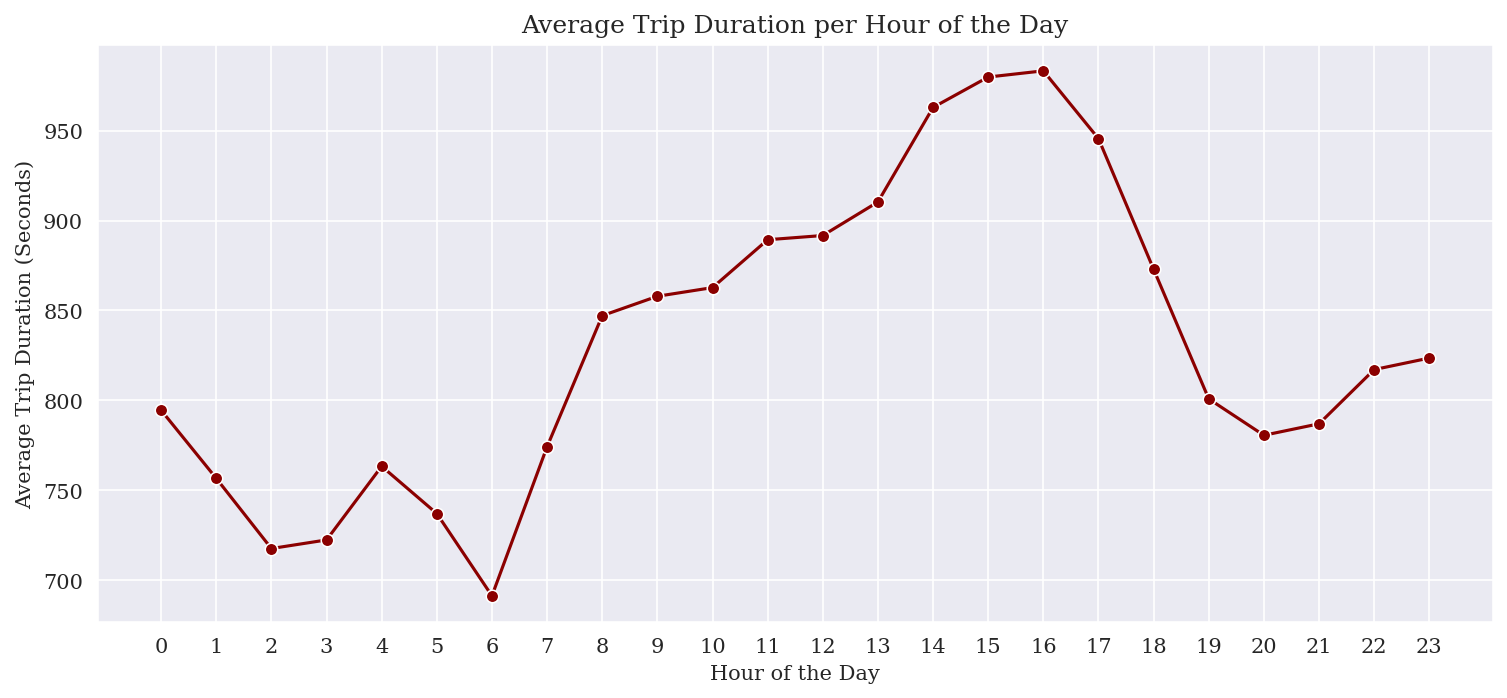

In [ ]:
plt.figure(figsize=(12, 5))

group = df.groupby('hour')['trip_duration'].mean().reset_index()
sns.lineplot(data=group, x='hour', y='trip_duration', marker='o', color='darkred')
plt.xticks(np.arange(0, 24, 1))
plt.title('Average Trip Duration per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration (Seconds)')


Text(258.08333333333337, 0.5, 'Day of Week')

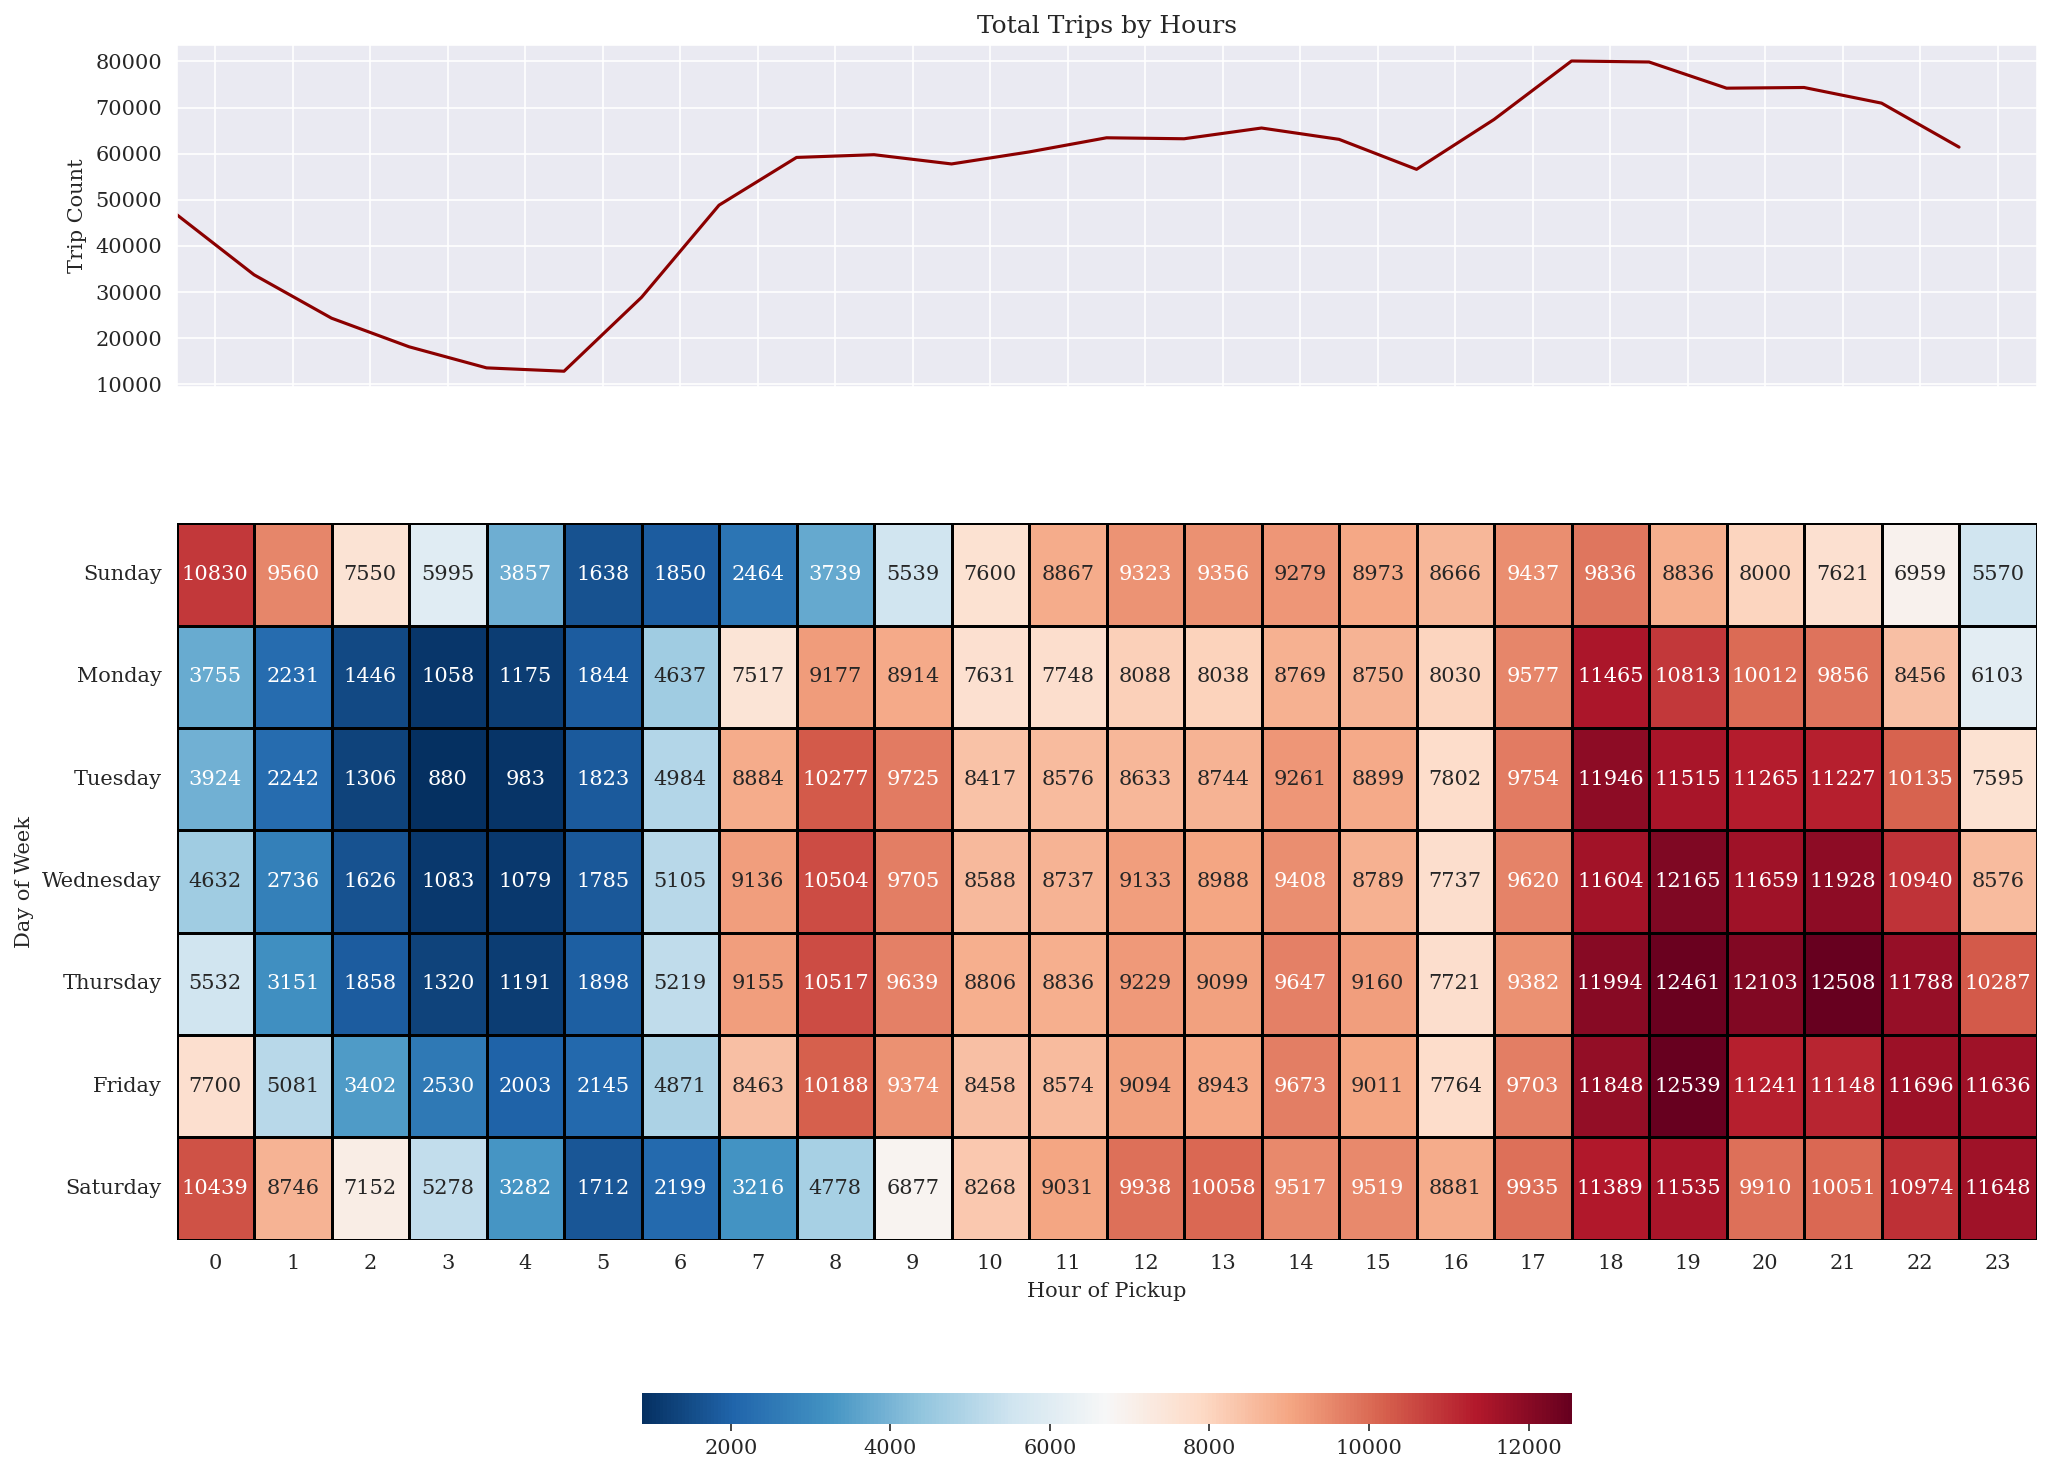

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 13), gridspec_kw={'height_ratios': [2, 6]}, sharex=True)

group = df.groupby('hour')['trip_duration'].size().reset_index()

sns.lineplot(data=group, x='hour', y='trip_duration', color='darkred', ax=ax1)
ax1.set_ylabel("Trip Count")
ax1.set_title("Total Trips by Hours")

heatmap_data = df.pivot_table(index='weekday', columns='hour', values='trip_duration', aggfunc='count')

days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
heatmap_data = heatmap_data.reindex(days)

sns.heatmap(heatmap_data, cmap="RdBu_r", annot=True, fmt=".0f", cbar=True, cbar_kws={'location': 'bottom', 'shrink': 0.5, 'aspect': 30}, ax=ax2, linewidths=0.5, linecolor='black')
ax2.set_xlabel("Hour of Pickup")
ax2.set_ylabel("Day of Week")

>#### From above plot, we can notice that the trips number at night are much less than in morning. there is an increasing pattern in the trips number from the night to morning. And the peak hours are from 6 PM to about 10 PM at the days from Monday to Friday. Specifically, the Thursday at 9 PM has the most rides count with 11201 trips.
>#### And while the work days (Monday to Friday) have few trips at the beginning hours of the day (12 AM and up), Saturday and Sunday are a little busy at these hours in a remarkable way. 

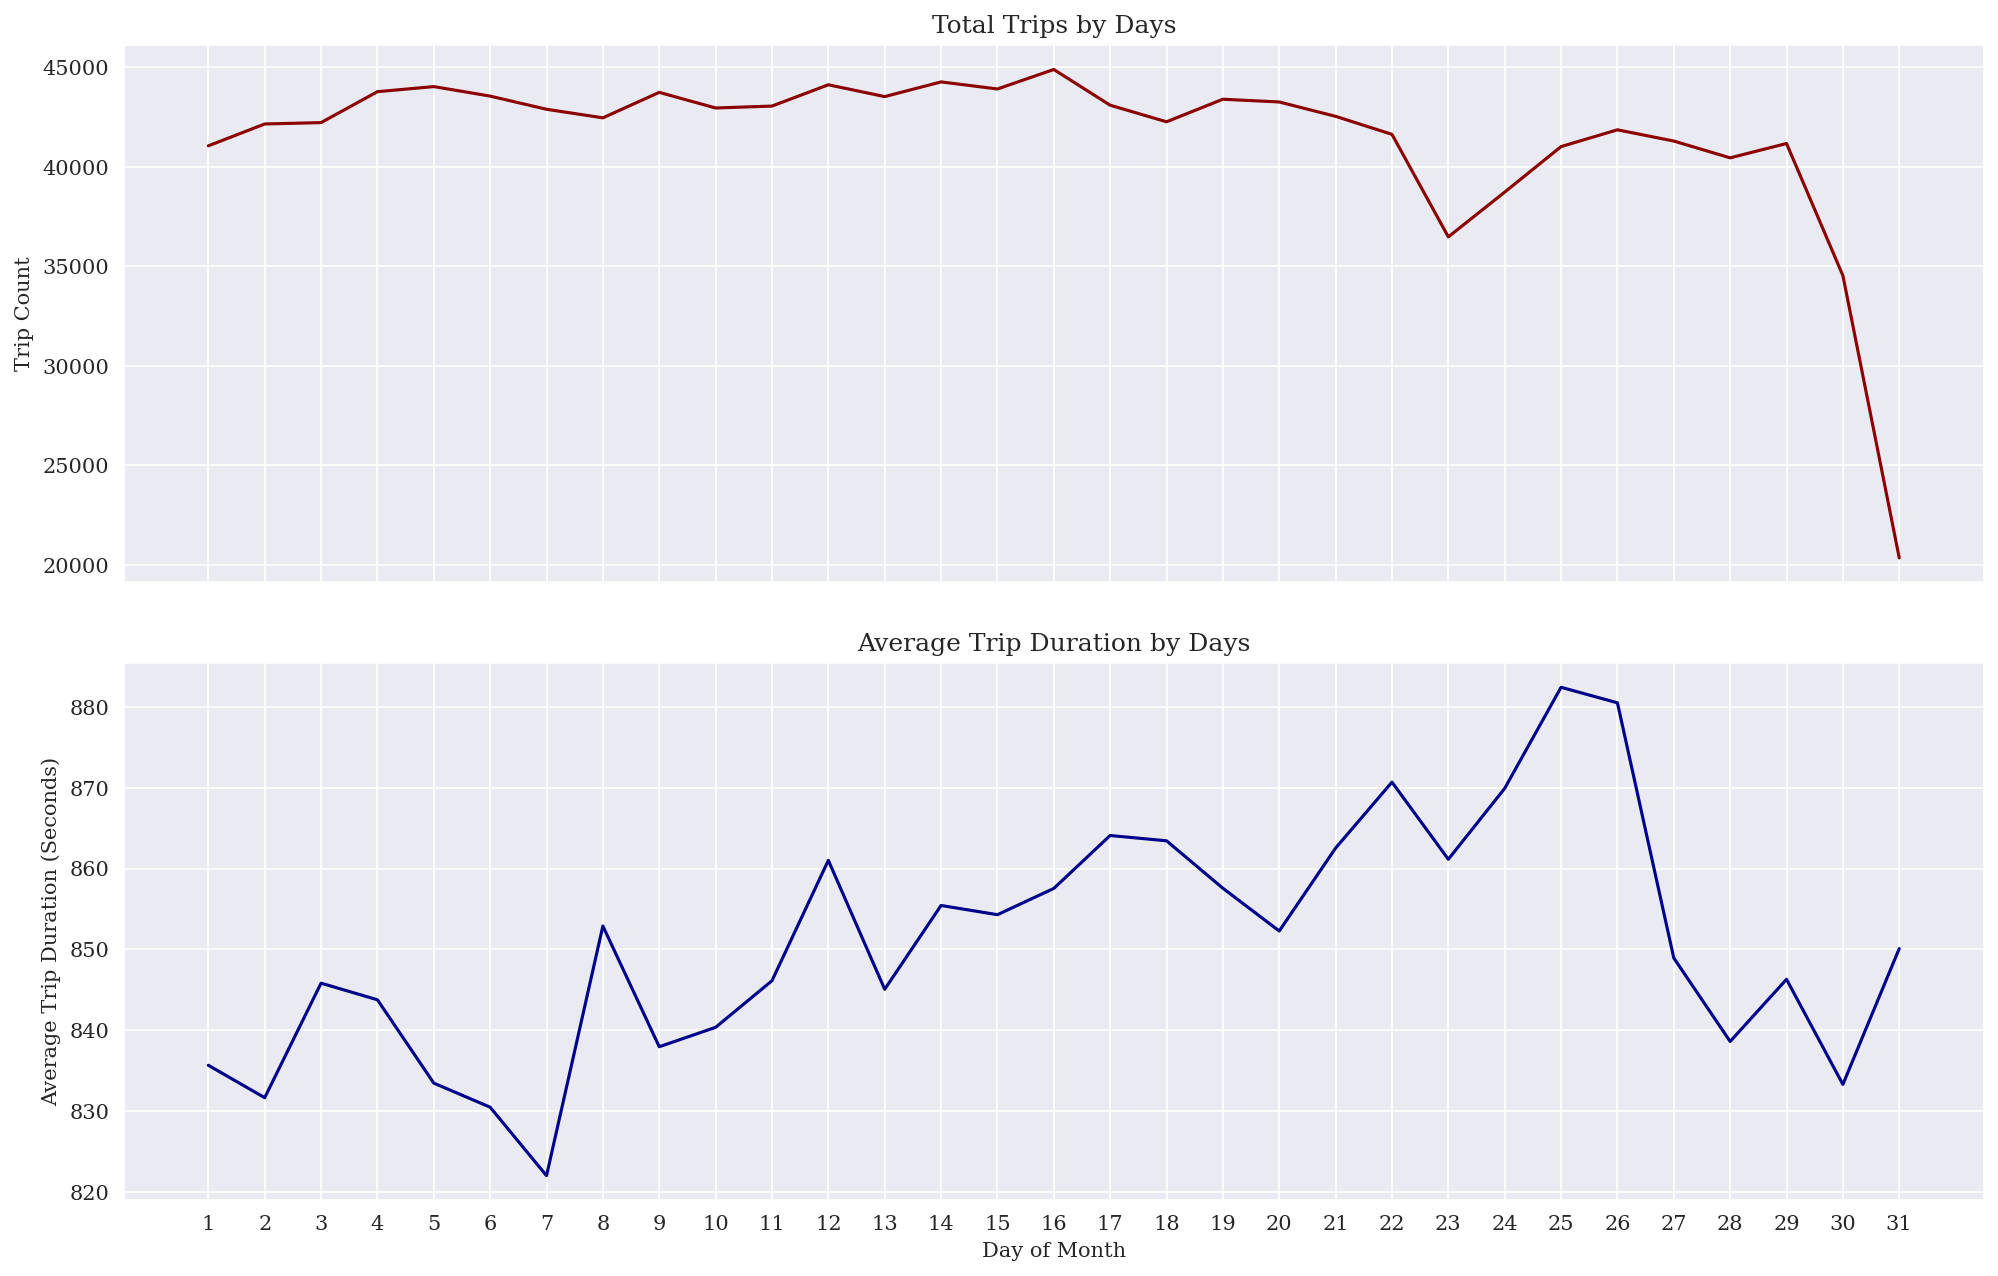

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), gridspec_kw={'hspace': 0.15}, sharex=True)

group1 = df.groupby('day')['trip_duration'].size().reset_index()
group2 = df.groupby('day')['trip_duration'].mean().reset_index()

sns.lineplot(data=group1, x='day', y='trip_duration', color='darkred', ax=ax1)
ax1.set_title("Total Trips by Days")
ax1.set_ylabel("Trip Count")


sns.lineplot(data=group2, x='day', y='trip_duration', color='darkblue', ax=ax2)
ax2.set_xticks(np.arange(1, 32, 1))
ax2.set_title("Average Trip Duration by Days")
ax2.set_ylabel("Average Trip Duration (Seconds)")
ax2.set_xlabel("Day of Month")

> #### I see no clear trend in the trip duration versus the month days and this is what i expected.
> #### From day 25 to the end of the month, trips count dropped by about 20000 trips whereas the most change in the average duration at this period was about 20 seconds (between days 25 and 28).
> #### The average duration doesn't reflect the impact of change in trips count clearly and the average duration has no clear trend overall.

>#### Now, i will use the longitude and latitiude coordinates to compute the distance between the pickup and dropoff locations.
> #### I will use manhattan distance as it's suitable for cities like NYC and i think it will be enough.

In [42]:
# haversine distance in kilometers
from haversine import haversine, Unit

df['haversine_distance'] = df.apply(
    lambda row : haversine(
        (row['pickup_latitude'], row['pickup_longitude']),
        (row['dropoff_latitude'], row['dropoff_longitude']),
        unit= Unit.KILOMETERS
    ), axis=1
)

In [43]:
# manhattan distance in kilometers
lat_diff = abs(df['pickup_latitude'] - df['dropoff_latitude']) * 111
lon_diff = abs(df['pickup_longitude'] - df['dropoff_longitude']) * 85  # distance between longitudes varies from a place to another on earth; for NYC it's around this value
df['manhattan_distance'] = lat_diff + lon_diff

In [44]:
df['manhattan_distance'].describe()

count    1.284414e+06
mean     4.508858e+00
std      5.194579e+00
min      0.000000e+00
25%      1.629288e+00
50%      2.749720e+00
75%      5.081912e+00
max      6.220734e+01
Name: manhattan_distance, dtype: float64

>#### clearly, the distance feature is right skewed which indicates outliers are there :(
>#### and also notice that the minimum is zero. this mean trips with 0 distance.

In [45]:
df[df['manhattan_distance'] == 0]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,average temperature,precipitation,snow depth,day,weekday,hour,month,haversine_distance,manhattan_distance
931425,2,1,-73.960815,40.765961,-73.960815,40.765961,663,51.0,0.54,0,6,Friday,6,5,0.0,0.0
466417,2,1,-73.994614,40.750378,-73.994614,40.750378,341,52.5,0.00,0,15,Sunday,8,5,0.0,0.0
187845,2,1,-73.982719,40.762253,-73.982719,40.762253,1100,77.0,0.00,0,22,Wednesday,15,6,0.0,0.0
508097,2,6,-73.988113,40.723804,-73.988113,40.723804,329,31.0,0.00,0,21,Thursday,7,1,0.0,0.0
1375470,2,1,-73.939034,40.805008,-73.939034,40.805008,548,55.5,0.00,0,30,Saturday,17,4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408441,1,1,-73.830002,40.666748,-73.830002,40.666748,681,62.5,0.16,0,23,Saturday,21,4,0.0,0.0
946262,1,1,-73.991631,40.754871,-73.991631,40.754871,1901,69.5,0.22,0,16,Thursday,12,6,0.0,0.0
500977,2,1,-73.793388,40.656582,-73.793388,40.656582,1575,52.0,0.20,0,12,Tuesday,19,4,0.0,0.0
1422843,1,1,-73.882103,40.769077,-73.882103,40.769077,224,45.0,0.00,0,22,Monday,13,2,0.0,0.0


>#### There are above 3000 trips with 0 distance and non zero duration.which is not reasonable at all. 
 >#### We can notice the durations of them aren't big. so, I think the reason of this maybe because the passengers leaved after short time because of the heavy traffic that made the taxi wait a lot or simply they are error.

Text(0.5, 0, 'Distance (km)')

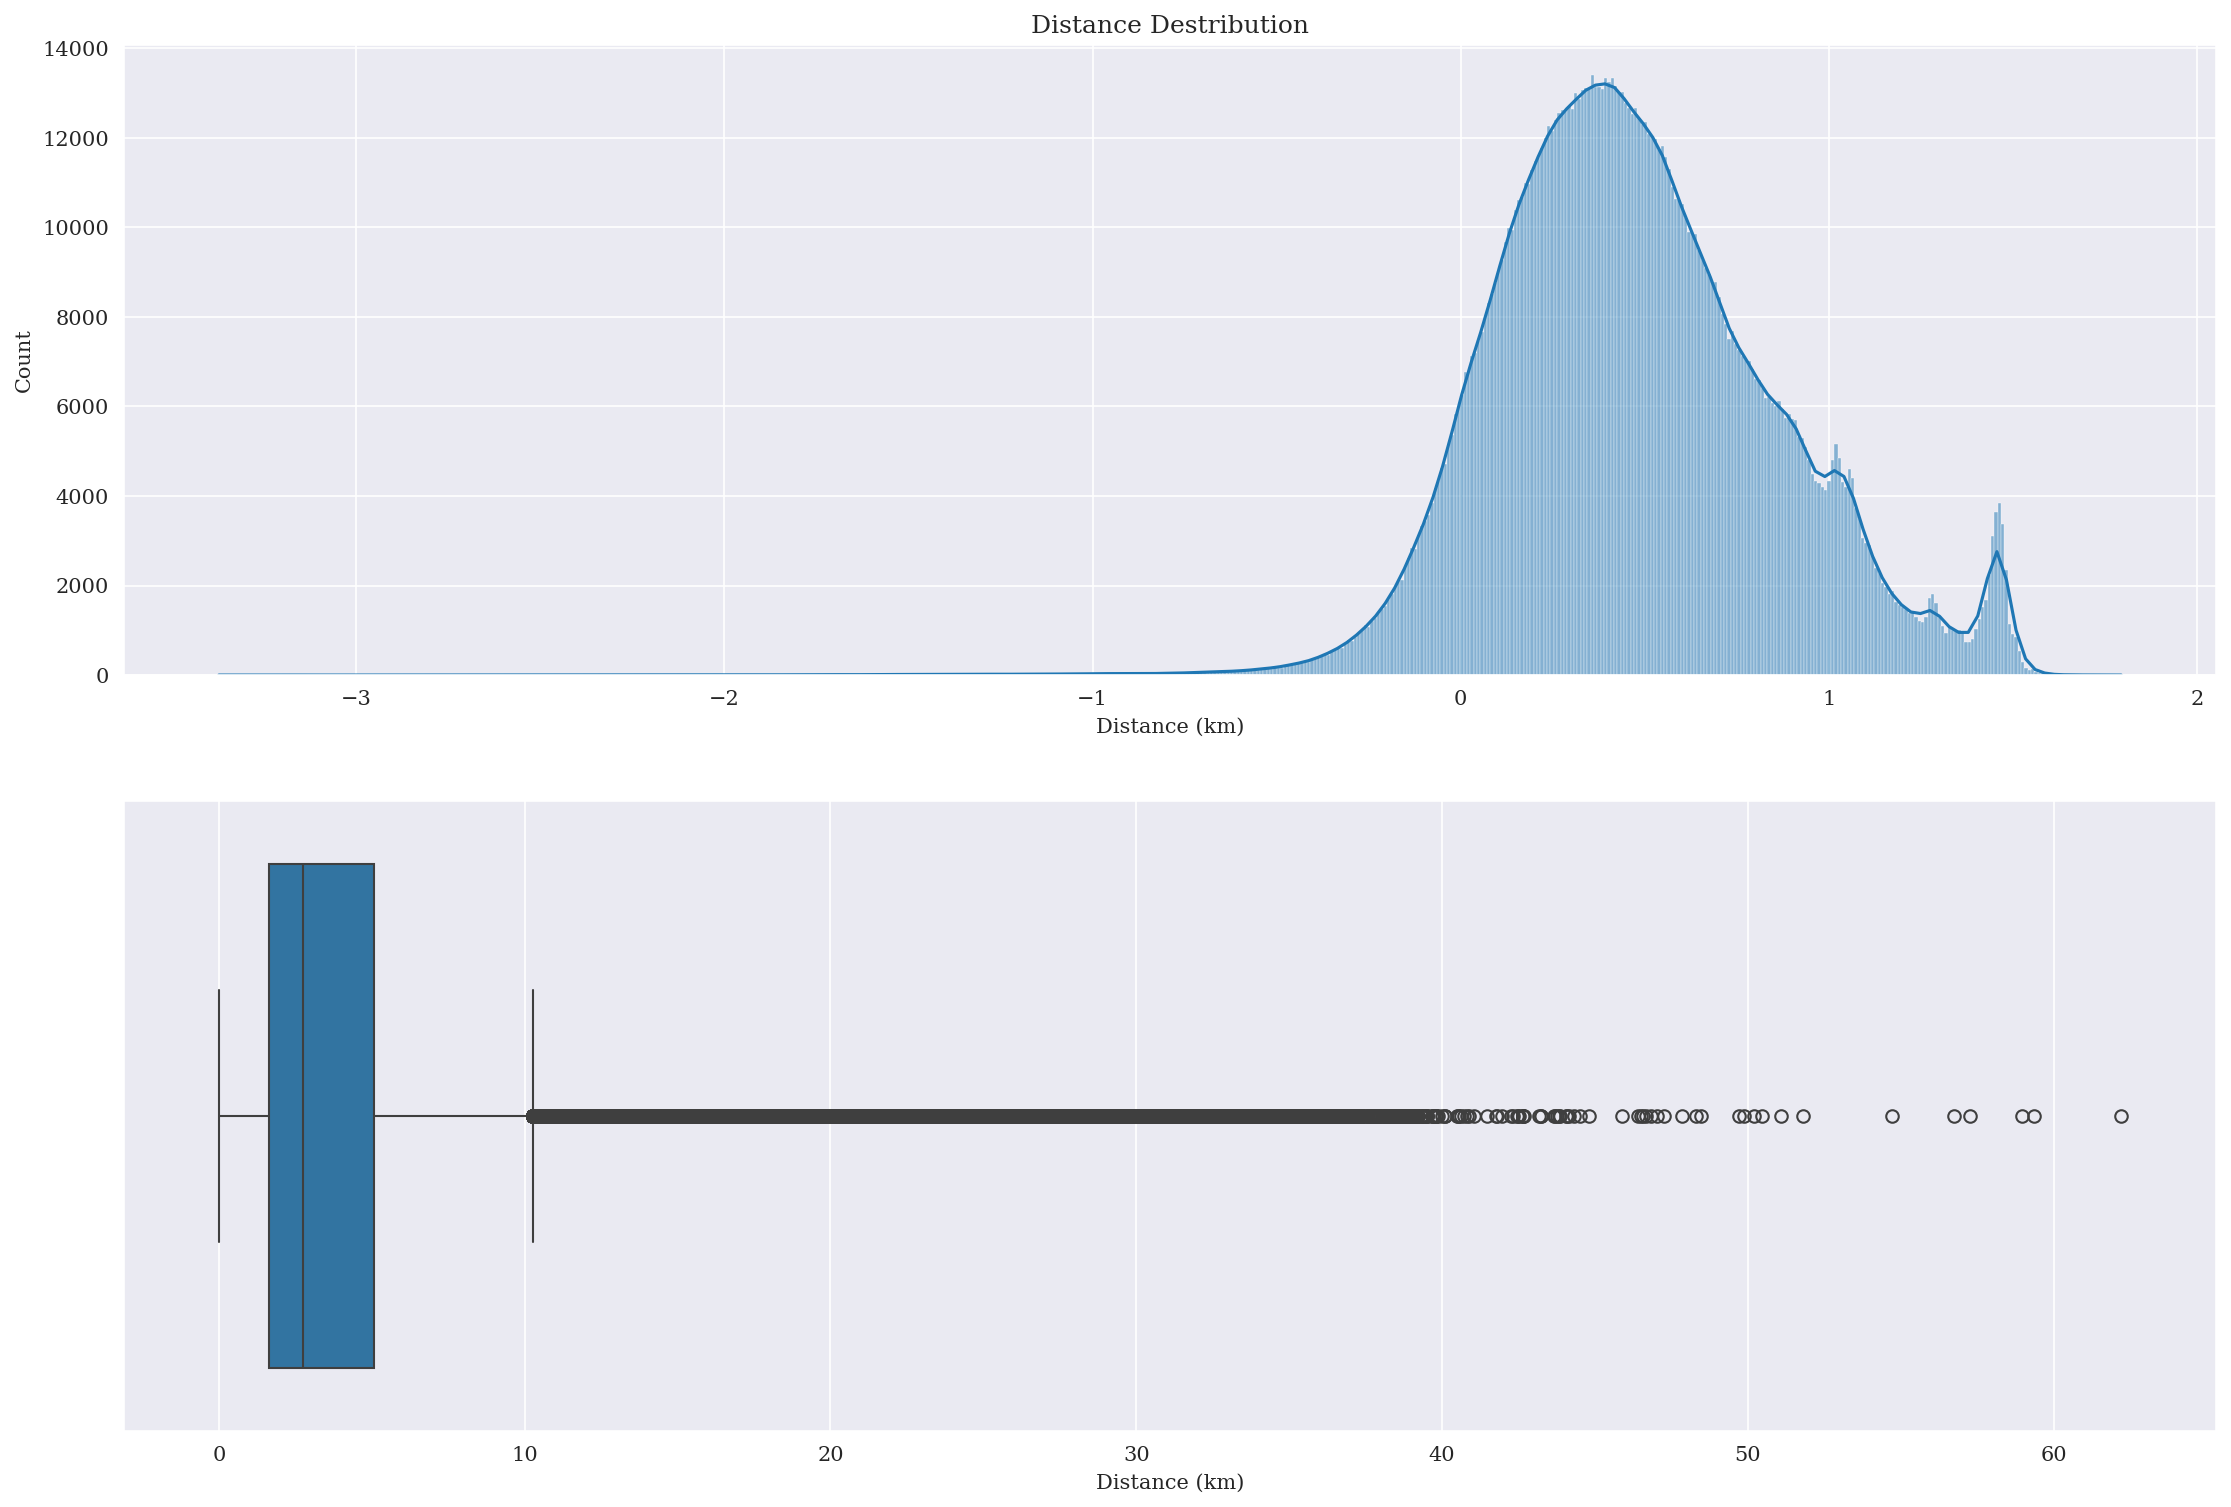

In [46]:
# visualize the distance feature
plt.figure(figsize=(18,12))

plt.subplot(2,1,1)
sns.histplot(x= np.log10(df['manhattan_distance']), kde=True)
plt.title('Distance Destribution')
plt.xlabel('Distance (km)')

plt.subplot(2,1,2)
sns.boxplot(data= df , x= 'manhattan_distance')
plt.xlabel('Distance (km)')

>#### so, we have huge outliers again here.

>#### I don't think it's normal to have such big distances like 50 km  and above for trip distances in New York.

<Axes: xlabel='manhattan_distance', ylabel='trip_duration'>

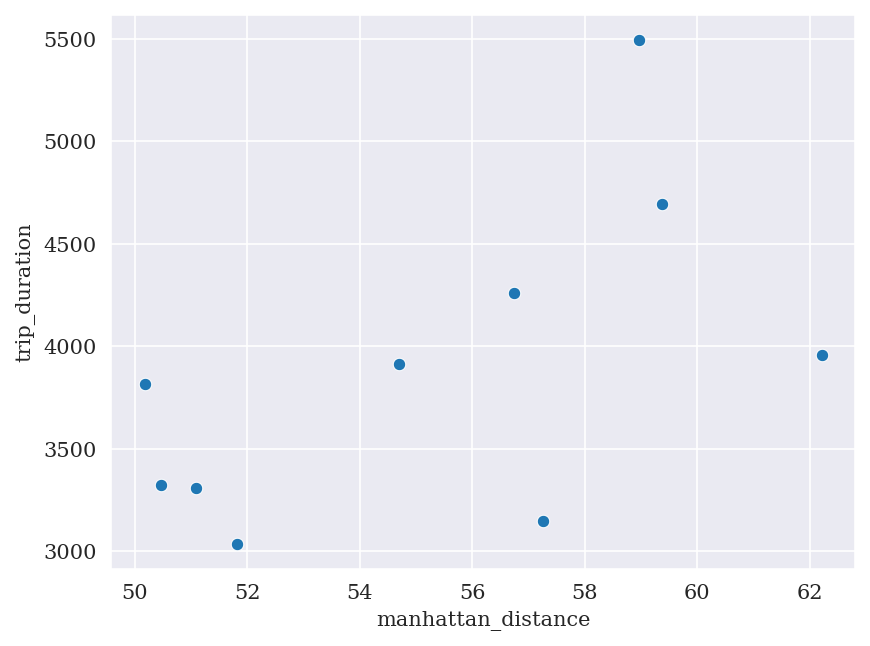

In [47]:
sns.scatterplot(data= df[df['manhattan_distance'] > 50], x= 'manhattan_distance', y= 'trip_duration')

> #### we see that the durations of these trips aren't as huge as their distances. which suggests that their coordinates are not correct.

> #### I will replace them with the average distance of the trips that have similar durations to their duration.

In [48]:
idx = df.loc[df['manhattan_distance'] > 50].index
for i in idx :
    duration = df.loc[i, 'trip_duration']
    avg_dist = df.loc[(abs(df['trip_duration'] - duration) < 100) & (df['manhattan_distance'] < 40), 'manhattan_distance'].mean()
    df.loc[i,'manhattan_distance'] = avg_dist

> #### investigate the distances above 20 km.

Text(0.5, 0, 'Distance (km)')

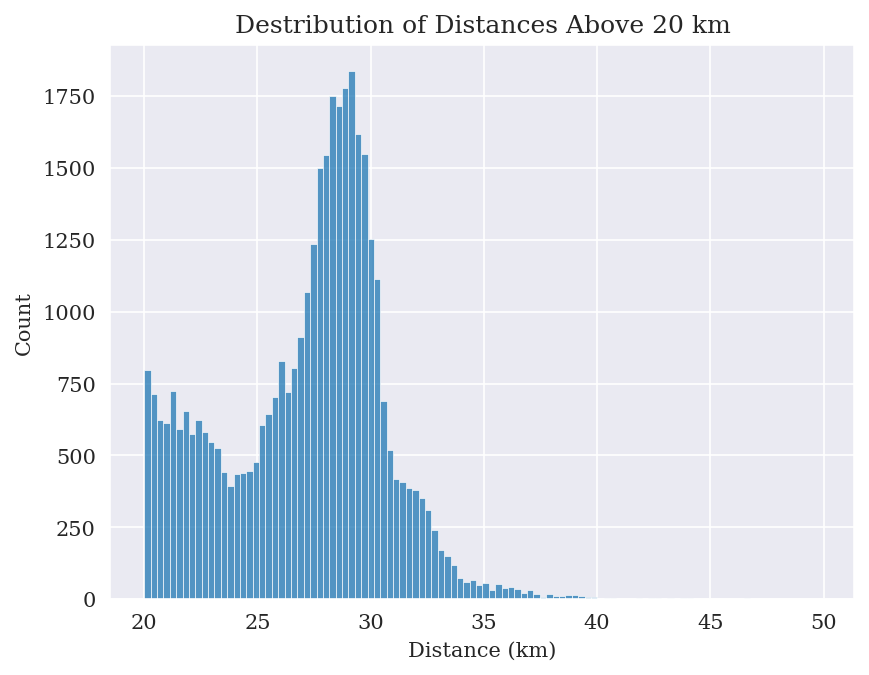

In [49]:
big_dists = df[df['manhattan_distance'] > 20]
sns.histplot(data=big_dists, x='manhattan_distance')
plt.title('Destribution of Distances Above 20 km')
plt.xlabel('Distance (km)')

>#### based on the above histogram,i will take a medium threshold before the second peak. I see that 40 km  is very conservative and big enough to be an upper limit for the distances. 

In [50]:
# number of records that will be removed. 
df[df['manhattan_distance'] > 40].count().iloc[0]

np.int64(50)

In [51]:
# remove outliers and zero-distance trips.
df = df[(df['manhattan_distance'] < 40) & (df['manhattan_distance'] > 0)]

In [52]:
df.shape

(1280845, 16)

>#### based on the two plots of 'Average Trip Duration pre Hour of the Day' and 'Number of Trips by Hour', i can add another boolean feature that indicate whether thuis is a peak(rush) hour or not.
>#### And based on these plots,i will choose from 7 to 18 to be rush hours.

In [53]:
df['rush_hour'] = df['hour'].isin(range(7, 19)).replace({True:1, False:0}).astype('category')

> ### And Finally, save the file.

In [ ]:
df.to_parquet('prepared_data/train.parquet') 